In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
#pd.__version__  # for the record

In [3]:
df = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
from mplfinance._panels import _build_panels

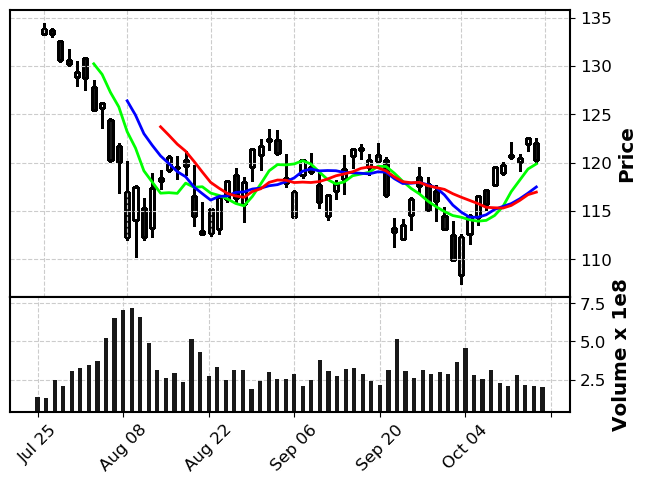

In [5]:
import mplfinance as mpf
s = mpf.make_mpf_style(base_mpf_style='classic',mavcolors=['lime','b','r'])
mpf.plot(df.iloc[15:75,:],type='candle',volume=True,figscale=1,mav=(7,11,15),style=s)

In [6]:
kk = 0
for jj in range(len(df)):
    kk += 1
    #if kk%8==0 or kk%9==0 or kk%10 ==0:
    if kk%18==0:
        df.iloc[jj,:] = float('nan')
    if kk == 18: kk = 0

In [7]:
df.head(2)
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700.0,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000.0,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100.0,136.500761,128.219241,0.551922
2012-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


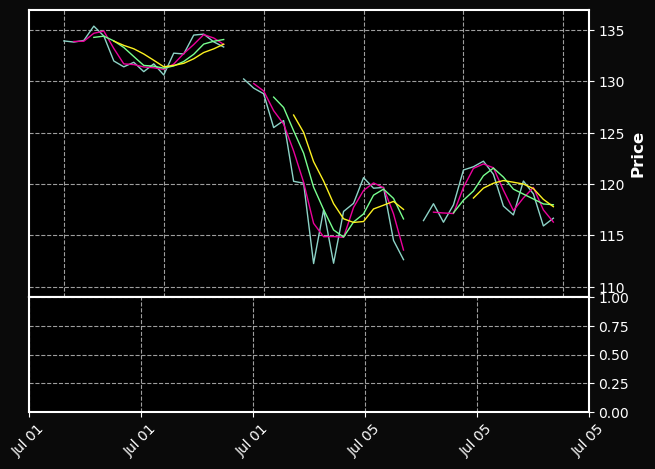

In [8]:
apdict = mpf.make_addplot(df.iloc[0:50,:]['LowerB'])

fig,ax = mpf.plot(df.iloc[0:50,:],type='line',mav=(2,4,6),style='mike',returnfig=True)

In [9]:
#pdf = _build_panels(fig,addplot=apdict)
#pdf

In [10]:
#apd = mpf.make_addplot(df['LowerB'],type='scatter')
# mpf.plot(df,type='candle',style='yahoo',mav=(24))
# mpf.plot(df,type='candle',style='yahoo',mav=(24),yscale='log')
# mpf.plot(df,type='candle',style='yahoo',mav=(24),yscale='symlog')
# mpf.plot(df,type='candle',style='yahoo',mav=(24),yscale='linear')

# mpf.plot(df,type='candle',mav=(24))
# mpf.plot(df,type='candle',mav=(24),yscale='log')
# mpf.plot(df,type='candle',mav=(24),yscale='symlog')
# mpf.plot(df,type='candle',mav=(24),yscale='linear')

In [11]:
def percentB_belowzero(percentB,price):
    import numpy as np
    signal   = []
    previous = -1.0
    for date,value in percentB.iteritems():
        if value < 0 and previous >= 0:
            signal.append(price[date]*0.99)
        else:
            signal.append(np.nan)
        previous = value
    return signal

In [12]:
tdf = df.loc['05-10-2012':'06-07-2012',]  # Take a smaller data set so it's easier to see the scatter points

signal = percentB_belowzero(tdf['PercentB'], tdf['Close'])

auto says do NOT use secondary_y ... for panel 0


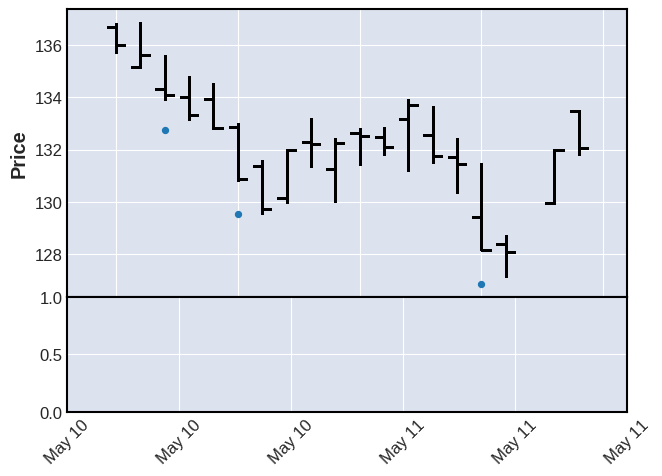

In [13]:
apd = mpf.make_addplot(signal,type='scatter')

mpf.plot(tdf,addplot=apd)

auto says do NOT use secondary_y ... for panel 0


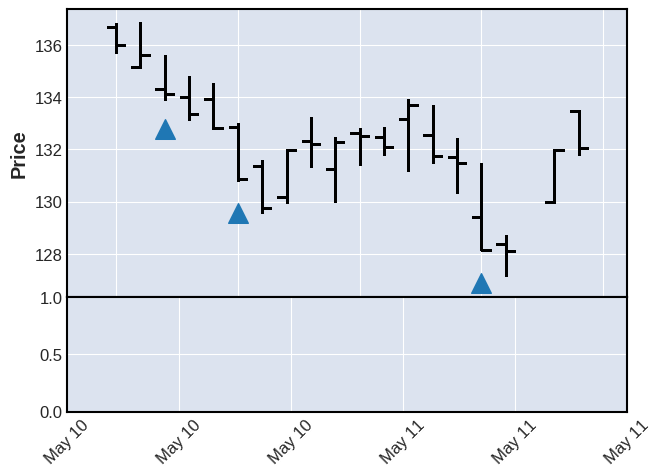

In [14]:
apd = mpf.make_addplot(signal,type='scatter',markersize=200,marker='^')

mpf.plot(tdf,addplot=apd)

auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0


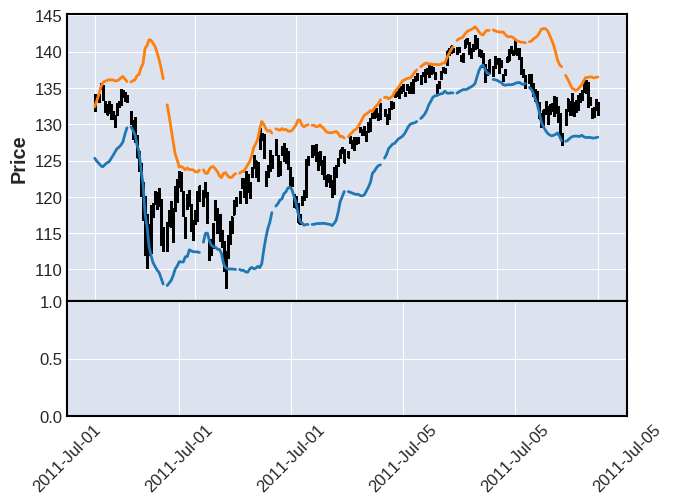

In [15]:
tcdf = df[['LowerB','UpperB']]  # DataFrame with two columns
apd  = mpf.make_addplot(tcdf)
mpf.plot(df,addplot=apd)

In [16]:
def percentB_aboveone(percentB,price):
    import numpy as np
    signal   = []
    previous = 2
    for date,value in percentB.iteritems():
        if value > 1 and previous <= 1:
            signal.append(price[date]*1.01)
        else:
            signal.append(np.nan)
        previous = value
    return signal

In [17]:
low_signal  = percentB_belowzero(df['PercentB'], df['Close']) 
high_signal = percentB_aboveone(df['PercentB'], df['Close'])

auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0


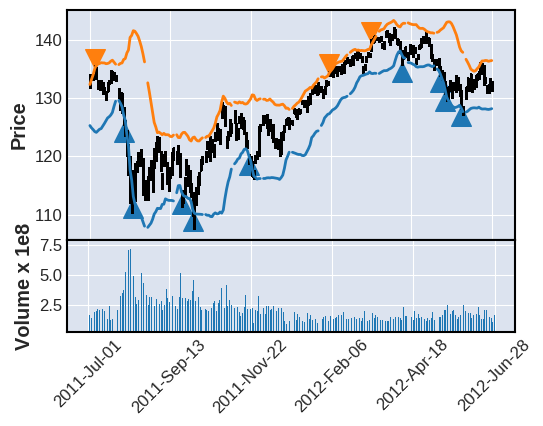

In [18]:
apds = [ mpf.make_addplot(tcdf),
         mpf.make_addplot(low_signal,type='scatter',markersize=200,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=200,marker='v'),
       ]

mpf.plot(df,addplot=apds,figscale=0.8,volume=True)

auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says USE secondary_y ... for panel 1


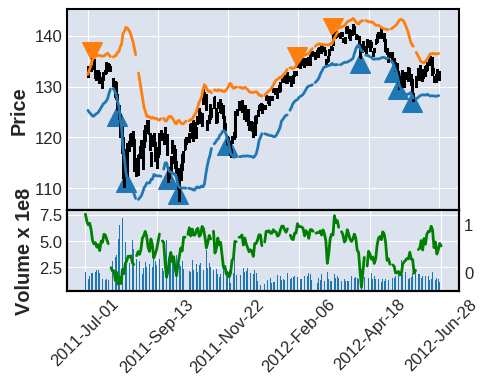

In [19]:
apds = [ mpf.make_addplot(tcdf),
         mpf.make_addplot(low_signal,type='scatter',markersize=200,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=200,marker='v'),
         mpf.make_addplot((df['PercentB']),panel=1,color='g')
       ]

mpf.plot(df,addplot=apds,figscale=0.7,volume=True)

auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says USE secondary_y ... for panel 1


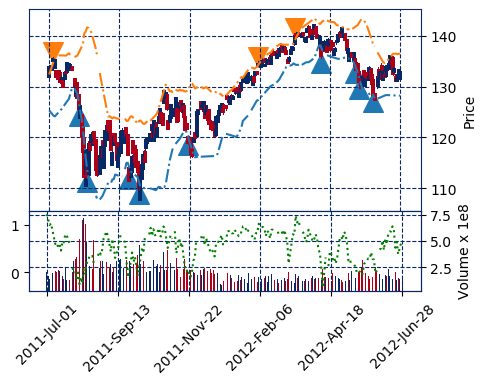

In [21]:
apds = [ mpf.make_addplot(tcdf,linestyle='dashdot'),
         mpf.make_addplot(low_signal,type='scatter',markersize=200,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=200,marker='v'),
         mpf.make_addplot((df['PercentB']),panel=1,color='g',linestyle='dotted')
       ]

mpf.plot(df,addplot=apds,figscale=0.7,volume=True,style='starsandstripes')

In [23]:
import math
# Change order of magnitude and range of low_signal, so that it will require a `secondary_y`:
# note: this calculation has no financial meaning whatsoever; we are just generating some 
#       data to modify the order of magnitude and range, so as to be able to demonstrate 
#       secondary_y on the main panel.
new_low_signal = [x*20.*math.sin(x) for x in low_signal] 

auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says USE secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says USE secondary_y ... for panel 1


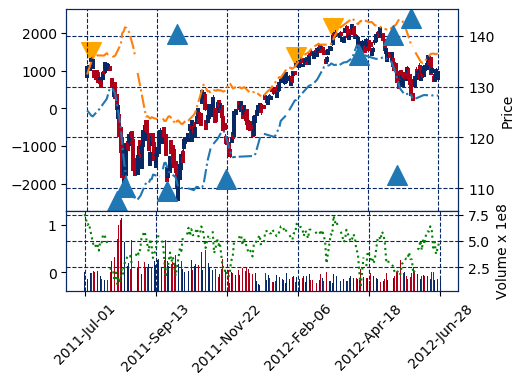

In [27]:
apds = [mpf.make_addplot(tcdf,linestyle='dashdot'),
        mpf.make_addplot(new_low_signal,type='scatter',markersize=200,marker='^',secondary_y='auto'),
        mpf.make_addplot(high_signal,type='scatter',markersize=200,marker='v',color='orange'),
        mpf.make_addplot((df['PercentB']),panel=1,color='g',linestyle='dotted')
       ]

mpf.plot(df,addplot=apds,figscale=0.7,volume=True,style='sas')

auto says do NOT use secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says USE secondary_y ... for panel 0
auto says do NOT use secondary_y ... for panel 0
auto says USE secondary_y ... for panel 1


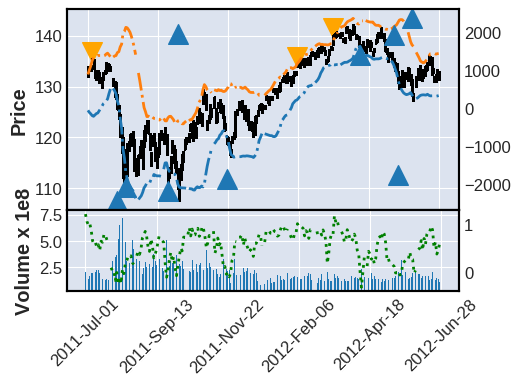

In [28]:
# The same plot, with a style that puts the primary y-axis on the left:
mpf.plot(df,addplot=apds,figscale=0.7,volume=True,style='default')